<a href="https://colab.research.google.com/github/shaheer-001/DPS/blob/main/InternshipProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Import Libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [9]:
#reading in the dataset
diabetes = pd.read_csv('/content/sample_data/diabetes.csv')
diabetes.shape

(768, 9)

In [10]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


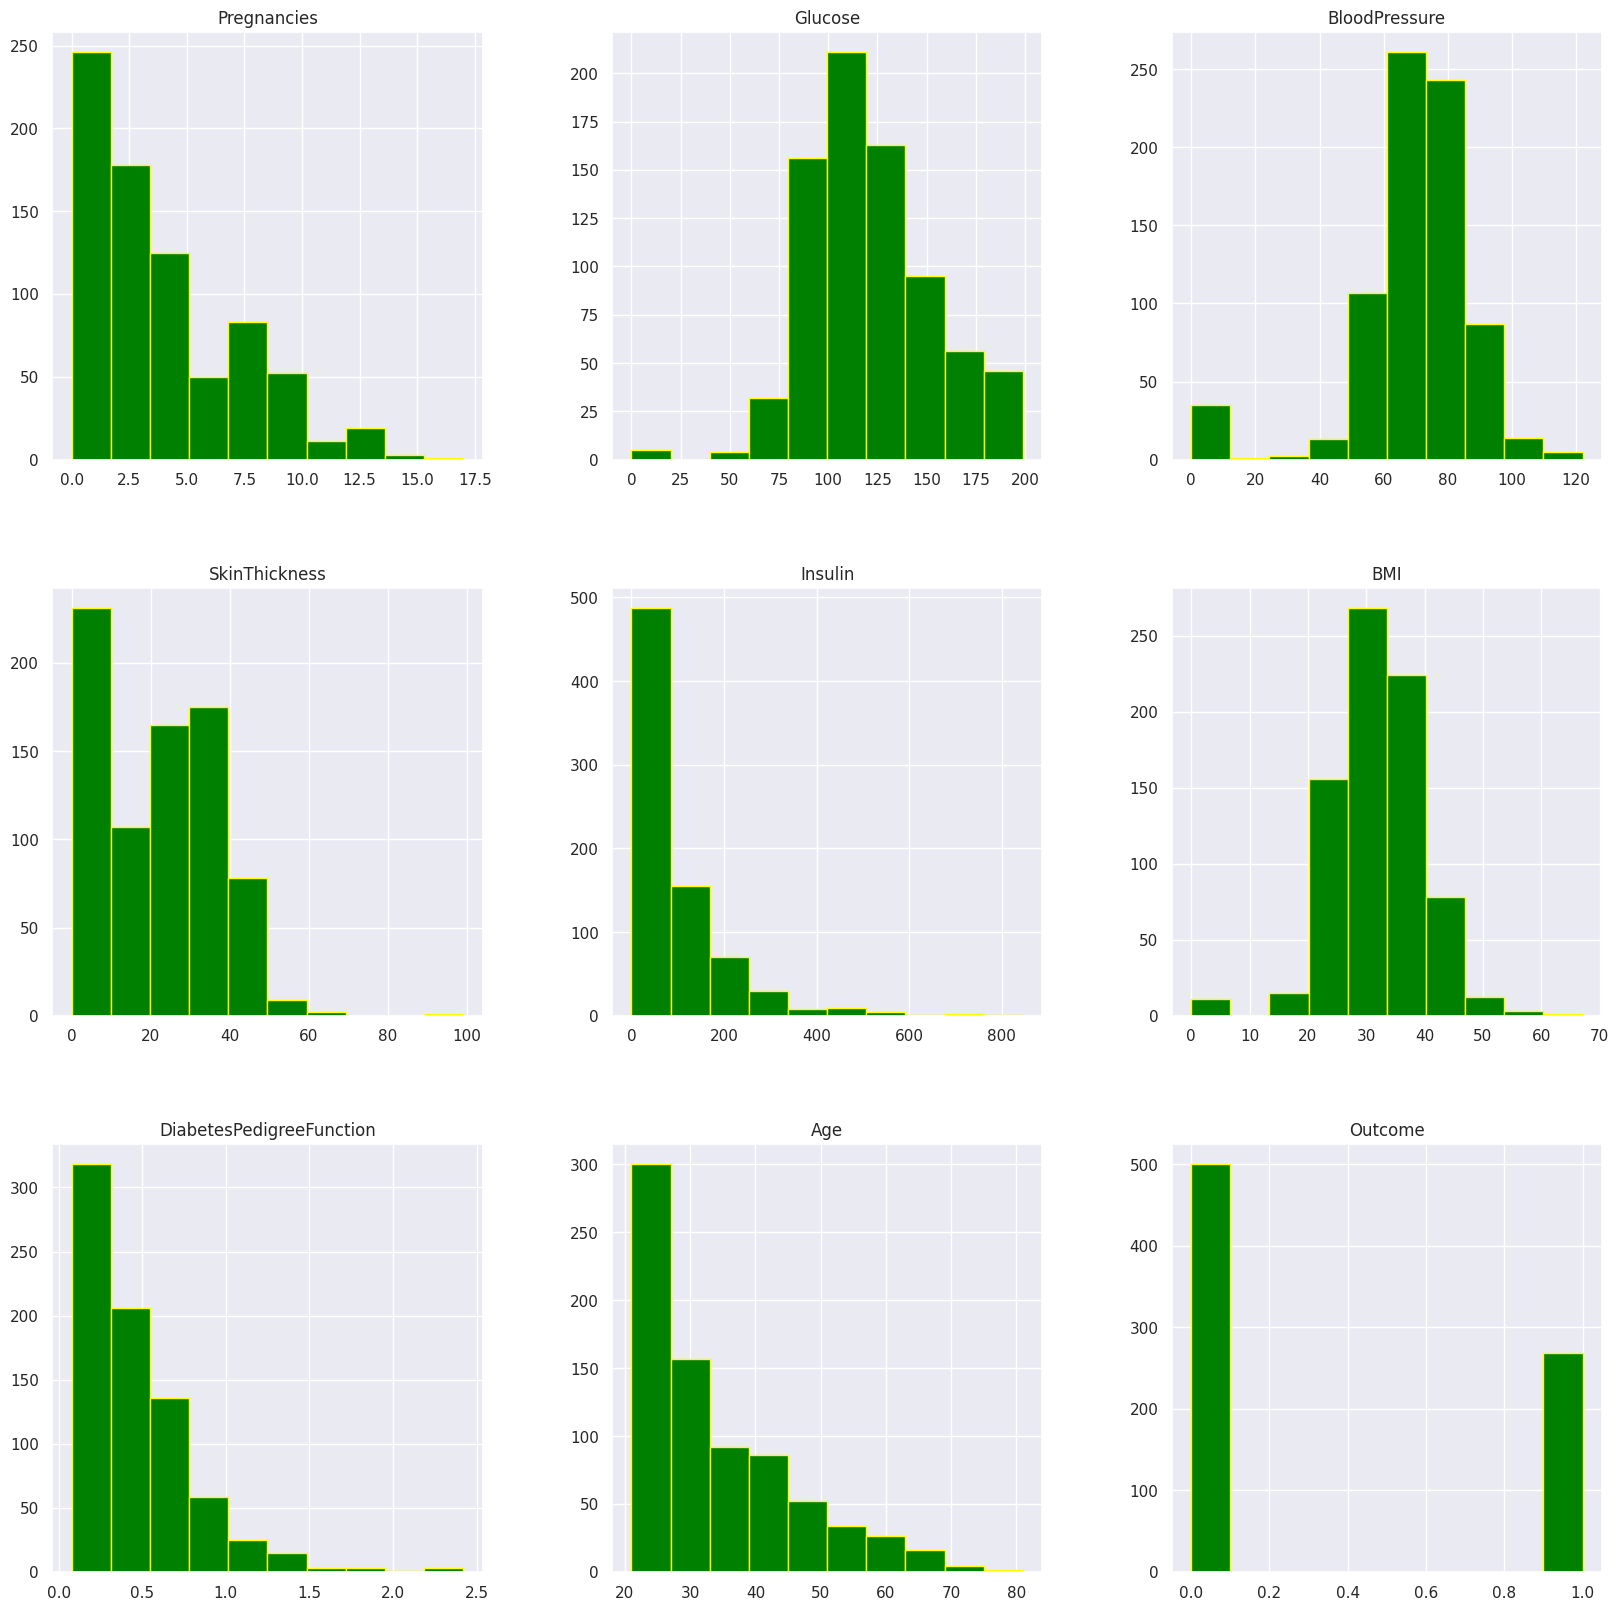

In [11]:
d = diabetes.hist(figsize = (20,20), color='green', edgecolor='yellow')

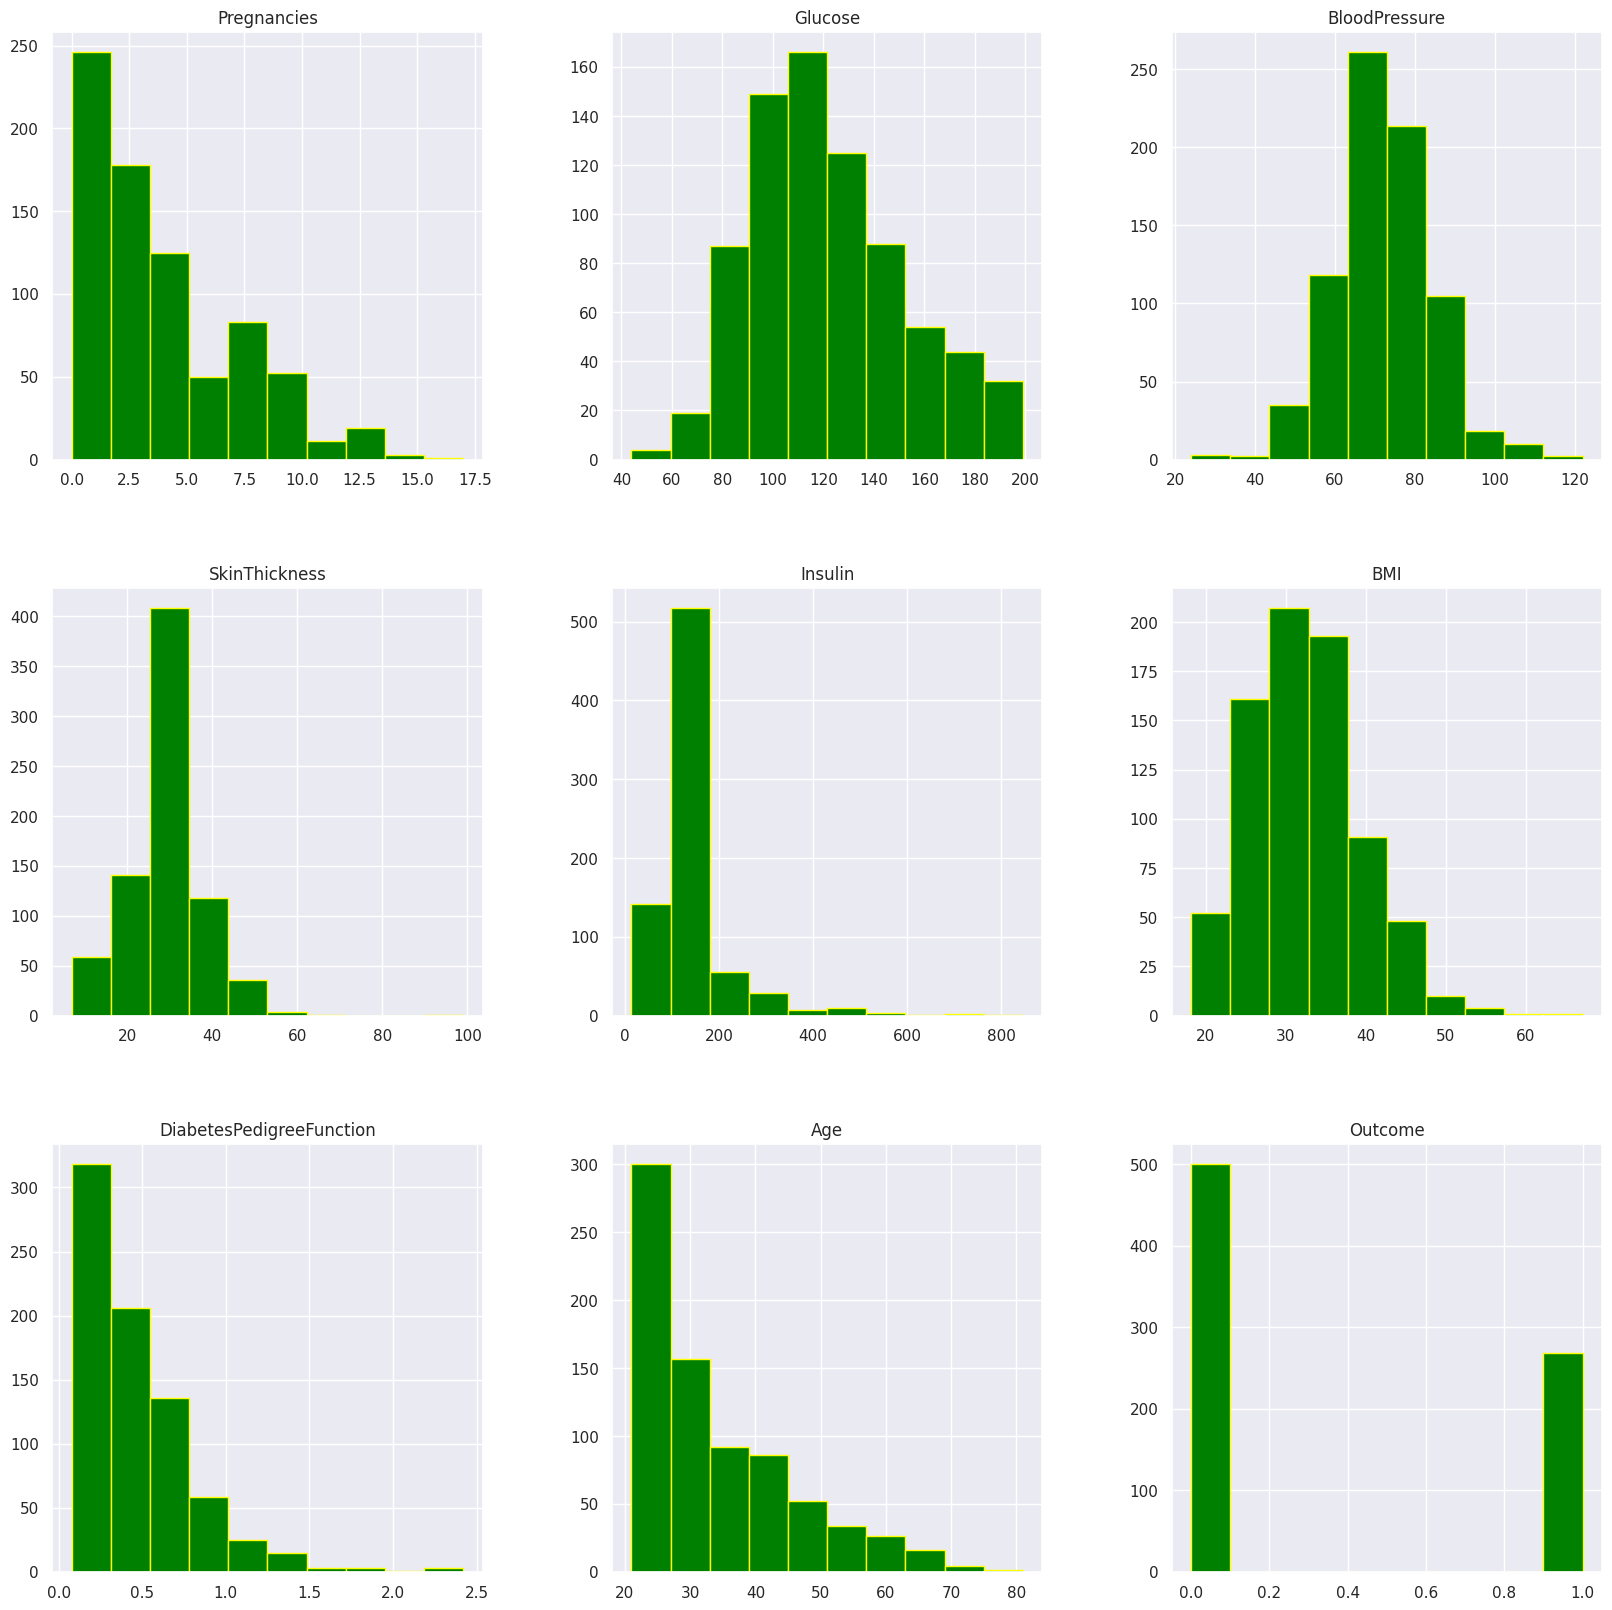

In [12]:
#replace zeros beacuse it might affect the outcome
replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in replace_zero:
    diabetes[column] = diabetes[column].replace(0, np.NaN) #replace 0 with no data
    mean = int(diabetes[column].mean(skipna=True)) #find the mean of the column
    diabetes[column] = diabetes[column].replace(np.NaN, mean) #replaces the NaN with mean
d = diabetes.hist(figsize = (20,20),color='green', edgecolor='yellow')

0    500
1    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Diabetes Outcome')

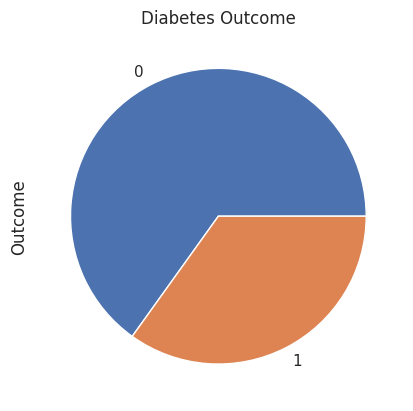

In [13]:
print(diabetes.Outcome.value_counts())
diabetes['Outcome'].value_counts().plot(kind='pie').set_title('Diabetes Outcome')

<Axes: xlabel='Age', ylabel='Glucose'>

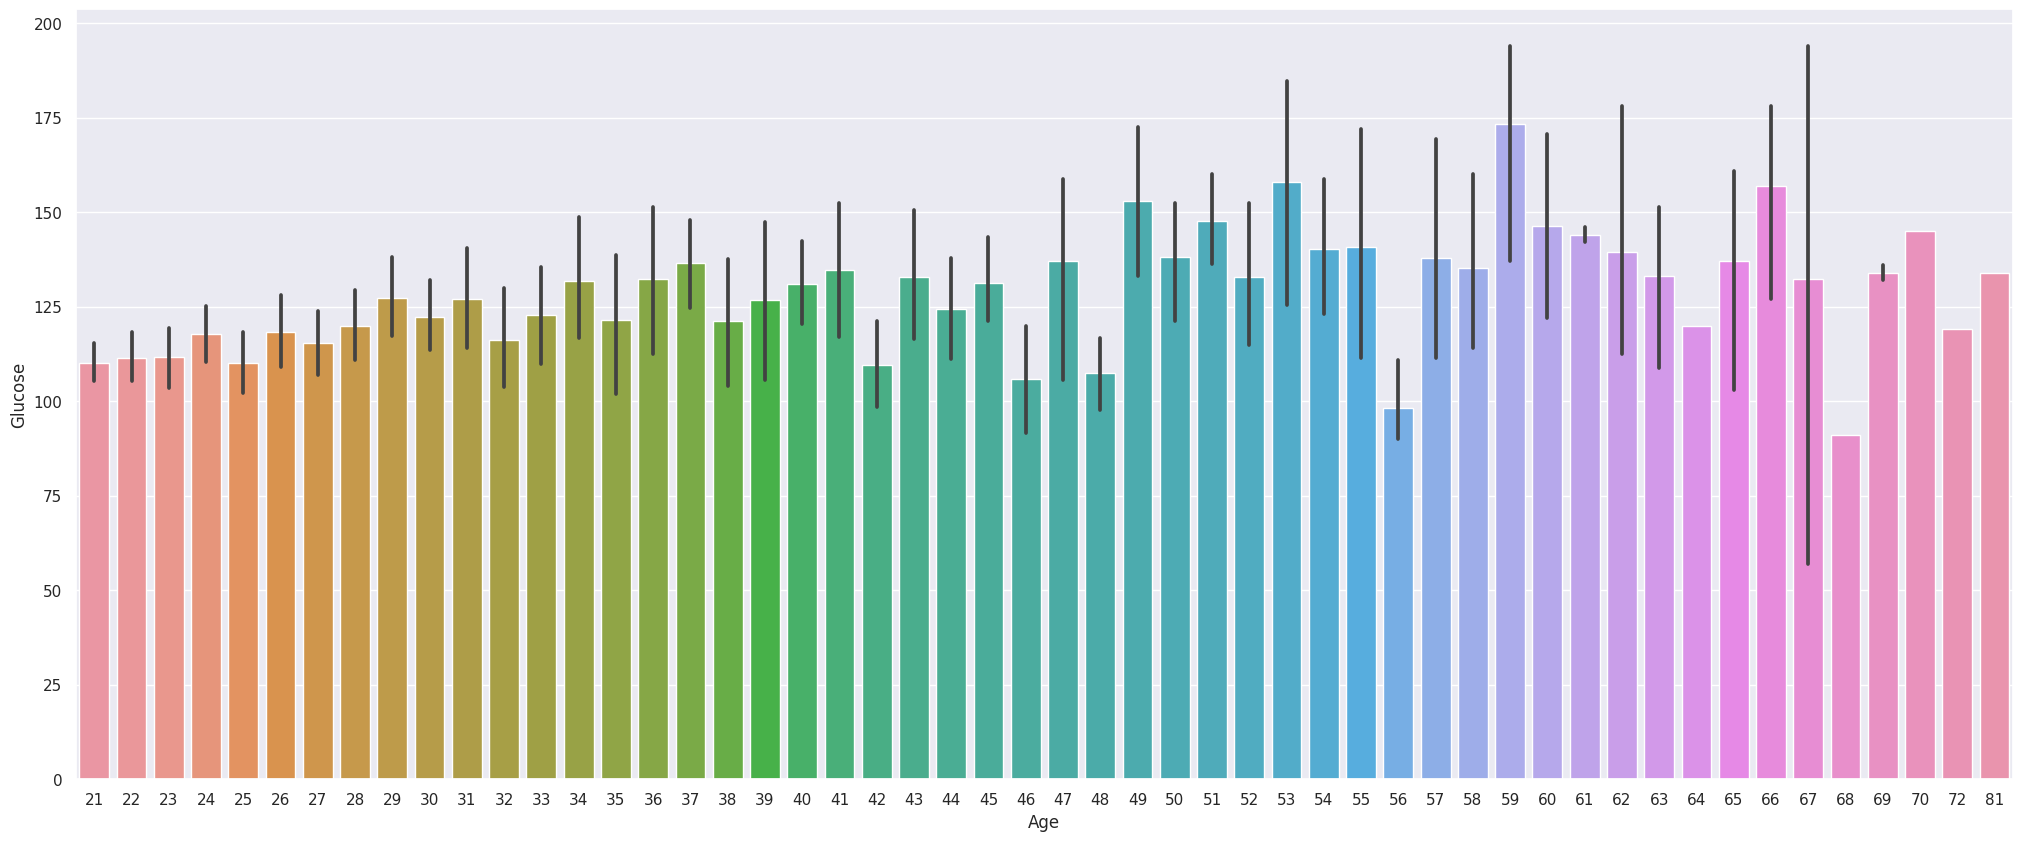

In [14]:
f, ax = plt.subplots(figsize= (25,10))
sns.barplot(x = diabetes['Age'], y = diabetes['Glucose'])

Text(0, 0.5, 'Age of Patient')

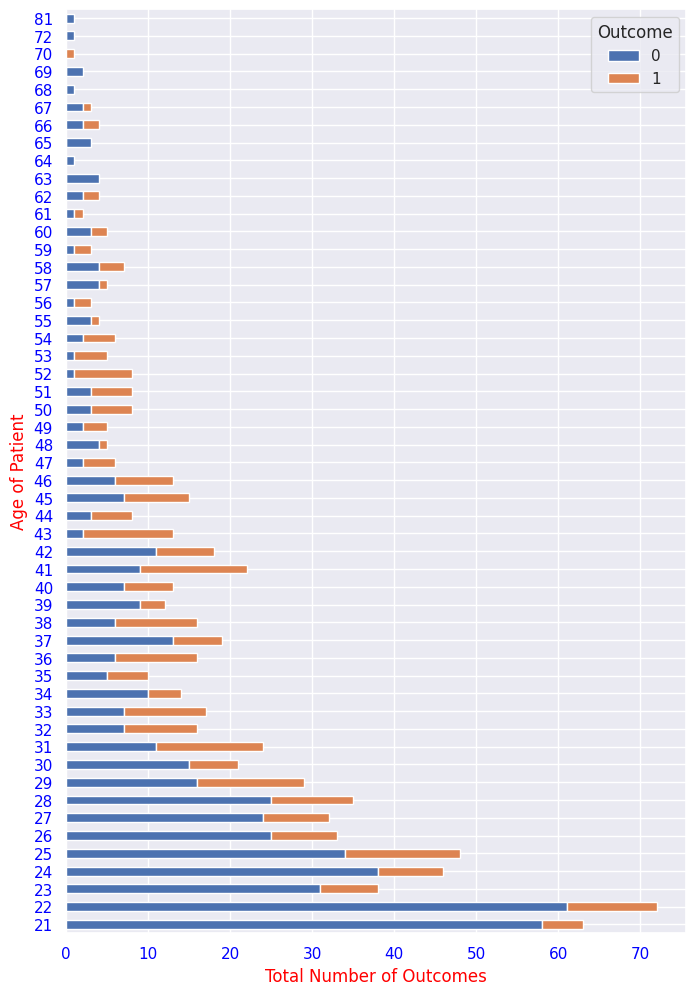

In [15]:
data_grouped = diabetes.groupby(['Age','Outcome'])['Outcome'].count().unstack()
data_grouped.plot(kind='barh', stacked=True, figsize= (8,12), edgecolor= 'white')
plt.xticks(color='blue')
plt.yticks(color='blue')
plt.xlabel('Total Number of Outcomes', color='red', fontsize=12)
plt.ylabel('Age of Patient', color='red', fontsize=12)

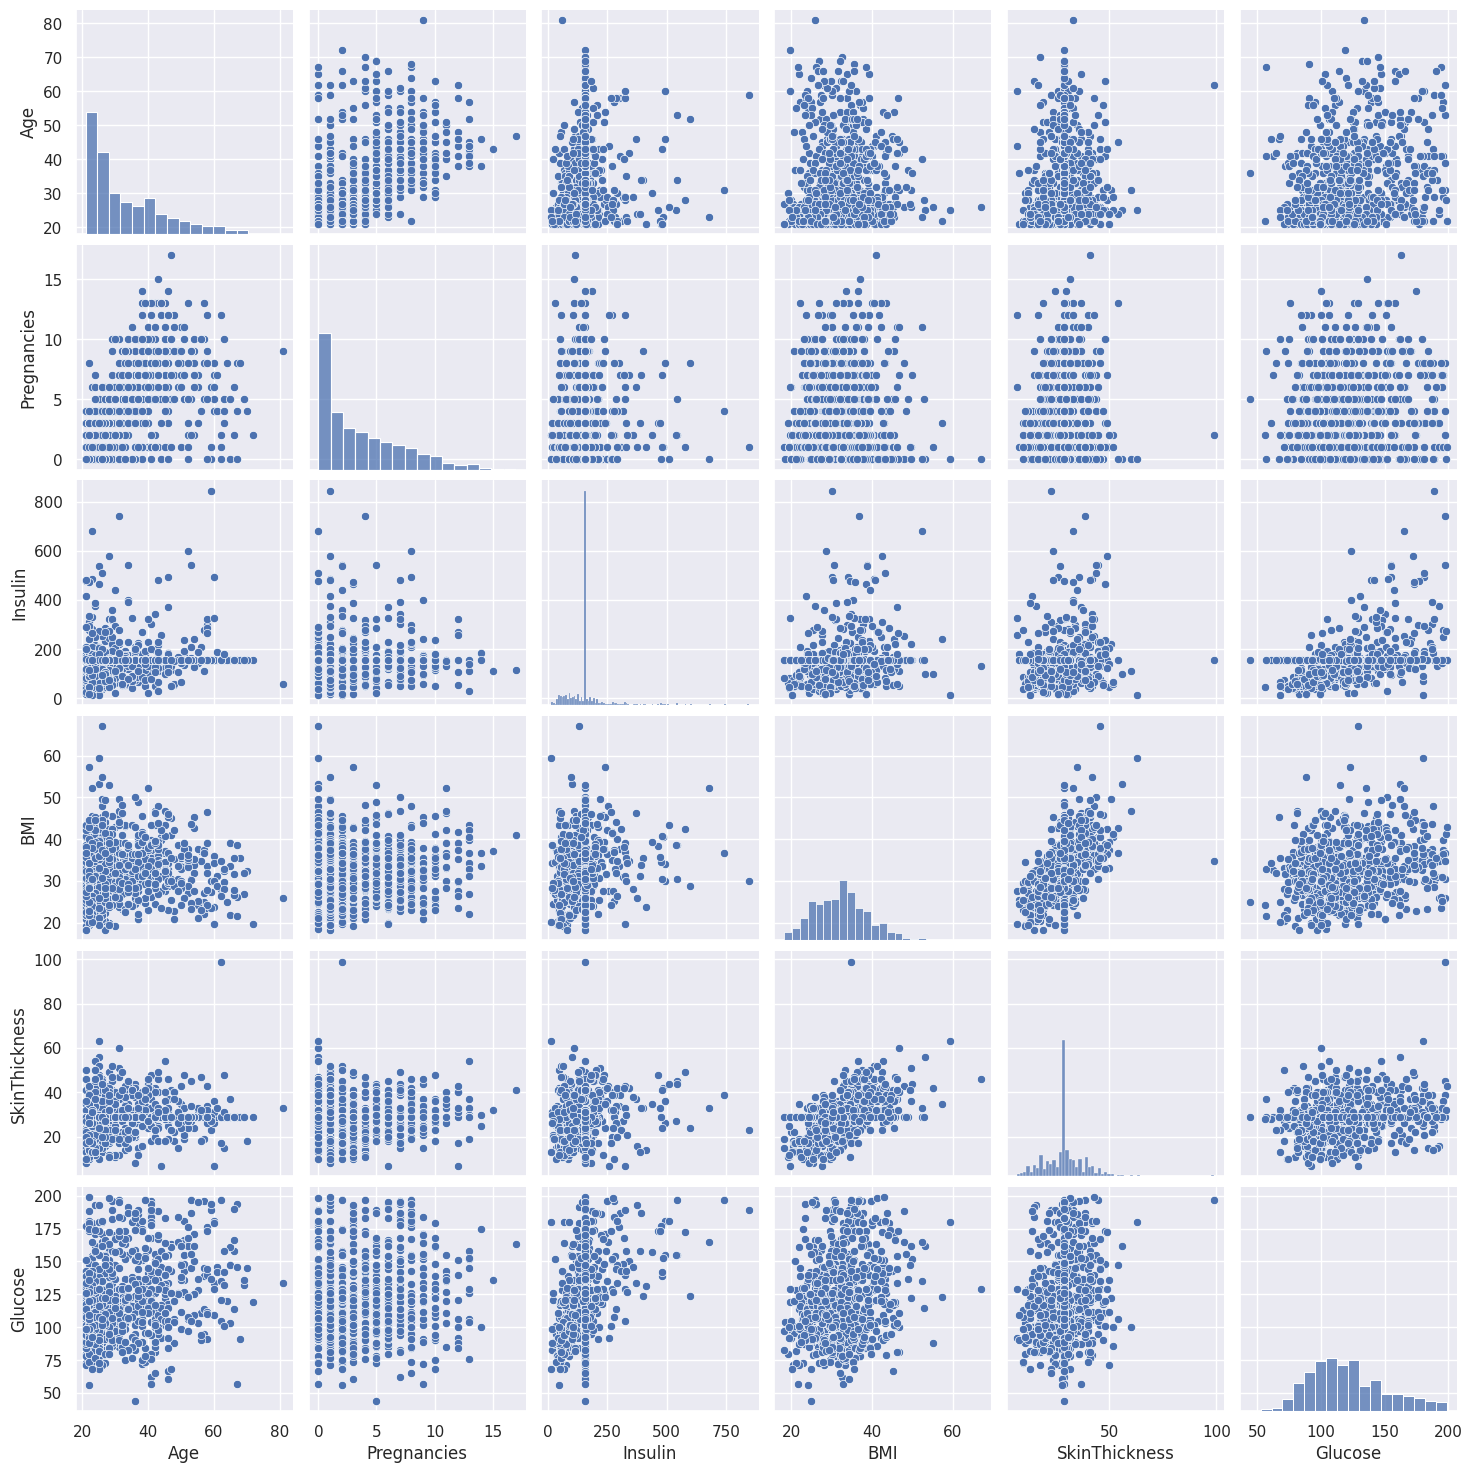

In [16]:
sns.pairplot(diabetes[['Age','Pregnancies','Insulin', 'BMI', 'SkinThickness', 'Glucose']])

In [19]:
#split data
a = diabetes.iloc[:, 0:8]
b = diabetes.iloc[:, 8]
a_train, a_test, b_train, b_test = train_test_split(a, b, random_state=0,test_size=0.2)

In [20]:
#Standardize the data - Feature Scaling
sc_a = StandardScaler()
a_train = sc_a.fit_transform(a_train)
a_test = sc_a.transform(a_test)

In [21]:
#define the model
model=LogisticRegression()
model.fit(a_train,b_train)

LogisticRegression()

In [22]:
b_pred=model.predict(a_test)

In [23]:
cm=confusion_matrix(b_test,b_pred)
print(cm)

[[97 10]
 [19 28]]


In [24]:
print(accuracy_score(b_test, b_pred))

0.8116883116883117


In [25]:
print(f1_score(b_test, b_pred))

0.6588235294117647


In [26]:
#Save the model
pickle.dump(model,open('model.pkl','wb'))

In [27]:
model=pickle.load(open('model.pkl','rb'))

In [31]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 27.9 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [32]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [38]:
flask run app.py

SyntaxError: ignored